In [1]:
# Loan Default Classification for Microfinance

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    roc_curve,
    auc
)

import warnings
warnings.filterwarnings("ignore")


In [5]:
# Update the path to where your CSV is saved
data_path = "C:/Users/UG/Desktop/Capstone/loan_borowwer_data.csv"

df = pd.read_csv(data_path)
df.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)

print("\nInfo:")
print(df.info())

print("\nSummary statistics:")
display(df.describe())

print("\nMissing values per column:")
print(df.isna().sum())


Shape of dataset: (9578, 14)

Columns:
 Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000



Missing values per column:
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


In [7]:
# Assuming 'not.fully.paid' is 1 = default, 0 = fully paid
target_col = "not.fully.paid"

df[target_col].value_counts(), df[target_col].value_counts(normalize=True)


(not.fully.paid
 0    8045
 1    1533
 Name: count, dtype: int64,
 not.fully.paid
 0    0.839946
 1    0.160054
 Name: proportion, dtype: float64)

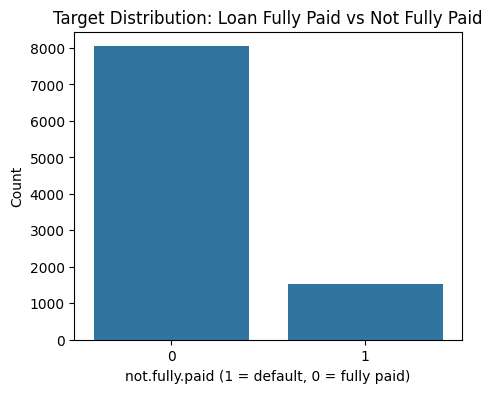

In [8]:
plt.figure(figsize=(5,4))
sns.countplot(x=target_col, data=df)
plt.title("Target Distribution: Loan Fully Paid vs Not Fully Paid")
plt.xlabel("not.fully.paid (1 = default, 0 = fully paid)")
plt.ylabel("Count")
plt.show()


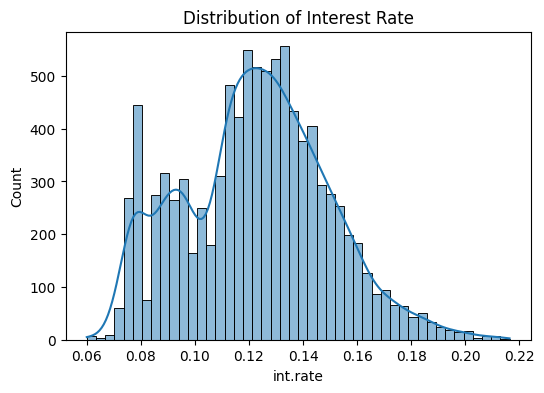

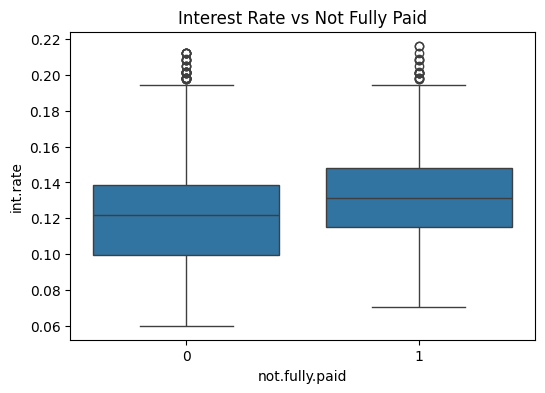

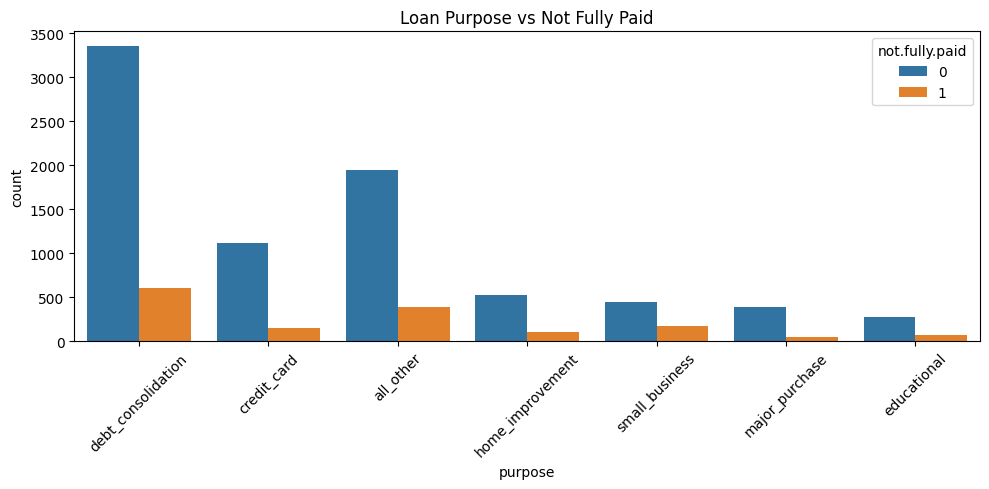

In [9]:
# Distribution of interest rate
plt.figure(figsize=(6,4))
sns.histplot(df["int.rate"], kde=True)
plt.title("Distribution of Interest Rate")
plt.show()

# Boxplot: interest rate vs default status
plt.figure(figsize=(6,4))
sns.boxplot(x=target_col, y="int.rate", data=df)
plt.title("Interest Rate vs Not Fully Paid")
plt.show()

# Categorical: purpose vs default
plt.figure(figsize=(10,5))
sns.countplot(x="purpose", hue=target_col, data=df)
plt.title("Loan Purpose vs Not Fully Paid")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


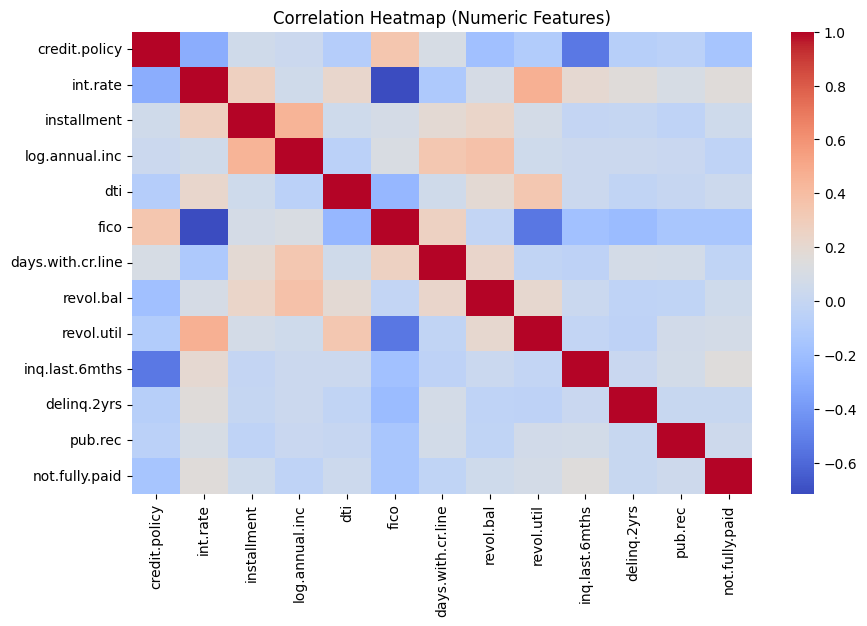

In [10]:
# Correlation heatmap for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(10,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [11]:
# Features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)


Numeric features: ['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
Categorical features: ['purpose']


In [12]:
# Train-test split (stratified so class balance is preserved)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (7662, 13) Test size: (1916, 13)


In [13]:
# Preprocessing: scale numeric, one-hot encode categorical
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [14]:
log_reg_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

log_reg_clf.fit(X_train, y_train)

y_pred_lr = log_reg_clf.predict(X_test)
y_prob_lr = log_reg_clf.predict_proba(X_test)[:, 1]

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8402922755741128

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1609
           1       0.52      0.05      0.08       307

    accuracy                           0.84      1916
   macro avg       0.68      0.52      0.50      1916
weighted avg       0.79      0.84      0.78      1916



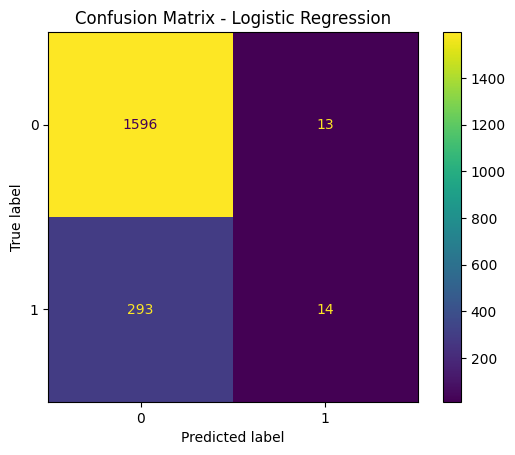

In [15]:
# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=[0, 1])
disp_lr.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


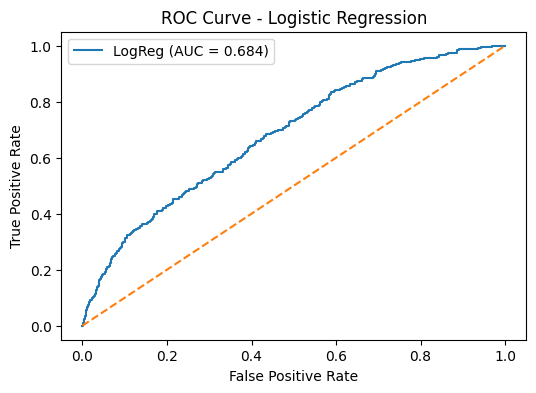

In [16]:
# ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(6,4))
plt.plot(fpr_lr, tpr_lr, label=f"LogReg (AUC = {roc_auc_lr:.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

In [17]:
rf_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"
    ))
])

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
y_prob_rf = rf_clf.predict_proba(X_test)[:, 1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8382045929018789

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.20      0.00      0.01       307

    accuracy                           0.84      1916
   macro avg       0.52      0.50      0.46      1916
weighted avg       0.74      0.84      0.77      1916



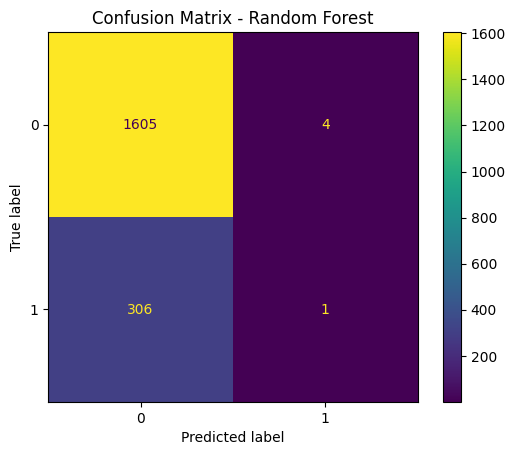

In [18]:
# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0, 1])
disp_rf.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()


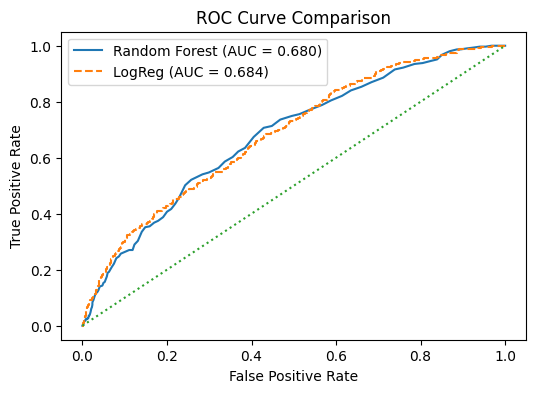

In [19]:
# ROC curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.3f})")
plt.plot(fpr_lr, tpr_lr, label=f"LogReg (AUC = {roc_auc_lr:.3f})", linestyle="--")
plt.plot([0,1], [0,1], linestyle=":")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [20]:
# Extract feature names after preprocessing
# (numeric + one-hot encoded categorical)
ohe = rf_clf.named_steps["preprocessor"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)

all_feature_names = np.concatenate([numeric_features, cat_feature_names])

rf_model = rf_clf.named_steps["model"]
importances = rf_model.feature_importances_

# Create DataFrame and show top 15 important features
feat_imp = pd.DataFrame({
    "feature": all_feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False).head(15)

feat_imp


,feature,importance
1,int.rate,0.115888
2,installment,0.110068
6,days.with.cr.line,0.108656
8,revol.util,0.106760
3,log.annual.inc,0.106666
7,revol.bal,0.105706
4,dti,0.104887
5,fico,0.084147
9,inq.last.6mths,0.054282
0,credit.policy,0.022783


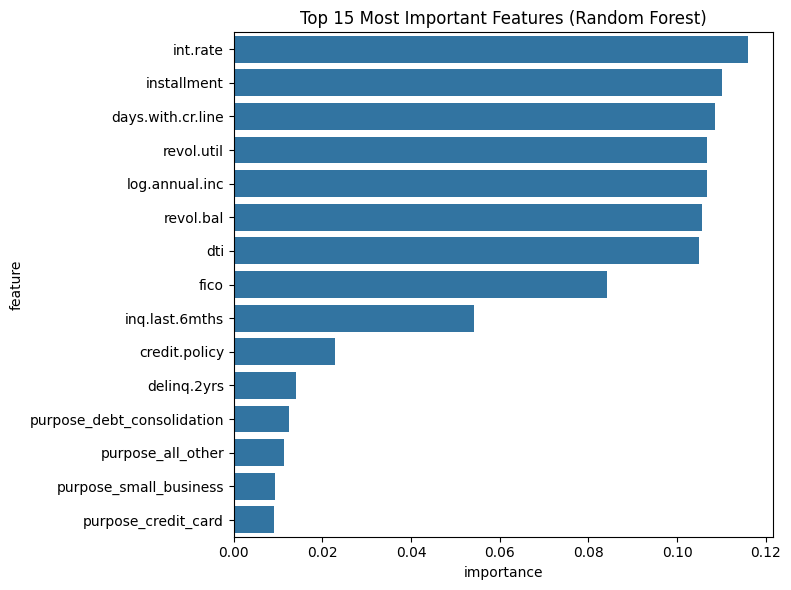

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp, x="importance", y="feature")
plt.title("Top 15 Most Important Features (Random Forest)")
plt.tight_layout()
plt.show()


In [22]:
import joblib

# Choose best model (you can decide based on accuracy / AUC)
best_model = rf_clf  # or log_reg_clf

joblib.dump(best_model, "loan_default_model.joblib")
print("Model saved to loan_default_model.joblib")


Model saved to loan_default_model.joblib
